In [ ]:
from keras.datasets import imdb 

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
len(train_data[0])

218

In [ ]:
len(train_data[1])

189

In [ ]:
word_index = imdb.get_word_index()
word_index

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

In [ ]:
' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
train_labels[0]

1

In [ ]:
# 정형화 

import numpy as np 

def vectorize_seq(seq, dimension=10000):
  result = np.zeros((len(seq), dimension))
  for i, s in enumerate(seq):
    result[i, s] = 1.
  return result

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [ ]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [ ]:
#모델 

from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, 
          validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 4s 24ms/step - loss: 0.5702 - accuracy: 0.7137 - val_loss: 0.3618 - val_accuracy: 0.8602
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2864 - accuracy: 0.9082 - val_loss: 0.2933 - val_accuracy: 0.8852
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2070 - accuracy: 0.9297 - val_loss: 0.3307 - val_accuracy: 0.8678
Epoch 4/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1700 - accuracy: 0.9422 - val_loss: 0.2906 - val_accuracy: 0.8864
Epoch 5/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1371 - accuracy: 0.9548 - val_loss: 0.3115 - val_accuracy: 0.8810
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1138 - accuracy: 0.9644 - val_loss: 0.3114 - val_accuracy: 0.8840
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0935 - accuracy: 0.9699 - val_loss: 0.3290 - val_accuracy: 0.8830
Epoch 8/20
40

In [ ]:
# 시각화 

history_dict=history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
loss = history_dict['loss']
val_loss =  history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

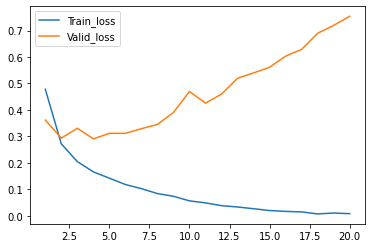

In [ ]:
plt.plot(epochs, loss, label='Train_loss')
plt.plot(epochs, val_loss, label='Valid_loss')
plt.legend() 
plt.show()

In [ ]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.5616 - accuracy: 0.7426
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2859 - accuracy: 0.9087
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2072 - accuracy: 0.9319
Epoch 4/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1714 - accuracy: 0.9435


In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2923 - accuracy: 0.8851


[0.29232895374298096, 0.8850799798965454]